## Data Description:
The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled).The
data has 8 quantitative input variables, and 1 quantitative output variable, and 1030
instances (observations).

## Domain: 
Cement manufacturing

## Context:
Concrete is the most important material in civil engineering. The concrete compressive
strength is a highly nonlinear function of age and ingredients. These ingredients include
cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine
aggregate.

## Attribute Information:
<ul>
    <li>Cement : measured in kg in a m3 mixture</li>
    <li>Blast : measured in kg in a m3 mixture</li>
    <li>Fly ash : measured in kg in a m3 mixture</li>
    <li>Water : measured in kg in a m3 mixture</li>
    <li>Superplasticizer : measured in kg in a m3 mixture</li>
    <li>Coarse Aggregate : measured in kg in a m3 mixture</li>
    <li>Fine Aggregate : measured in kg in a m3 mixture</li>
    <li>Age : day (1~365)</li>
    <li>Concrete compressive strength : measured in MPa</li>
</ul>

In [273]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import math
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from scipy.stats import uniform
from IPython.display import display 
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [274]:
# Read the dataset
concrete_data = pd.read_csv("concrete.csv")

In [275]:
# EDA
concrete_data.shape

(1030, 9)

In [276]:
concrete_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [277]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [278]:
concrete_data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [279]:
# Observation :
# This shows that the given dataset does not have any missing values.

In [280]:
concrete_data[concrete_data.duplicated(subset=None)]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [281]:
# Observation :
# This shows that the given dataset has duplicate rows, which are needed to be removed before proceeding further.

In [282]:
# Removing duplicate rows from the given dataset
concrete_data.drop_duplicates(subset=None, keep='first', inplace=True)

In [283]:
concrete_data.shape

(1005, 9)

In [284]:
concrete_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


In [285]:
# Observation :
# 1. Data needs to be normalised since there is a lot variation in the scales of data columns.
# 2. There are outliers present in this dataset looking at the "75%" and "max" columns above.

In [286]:
# Univariate Analysis

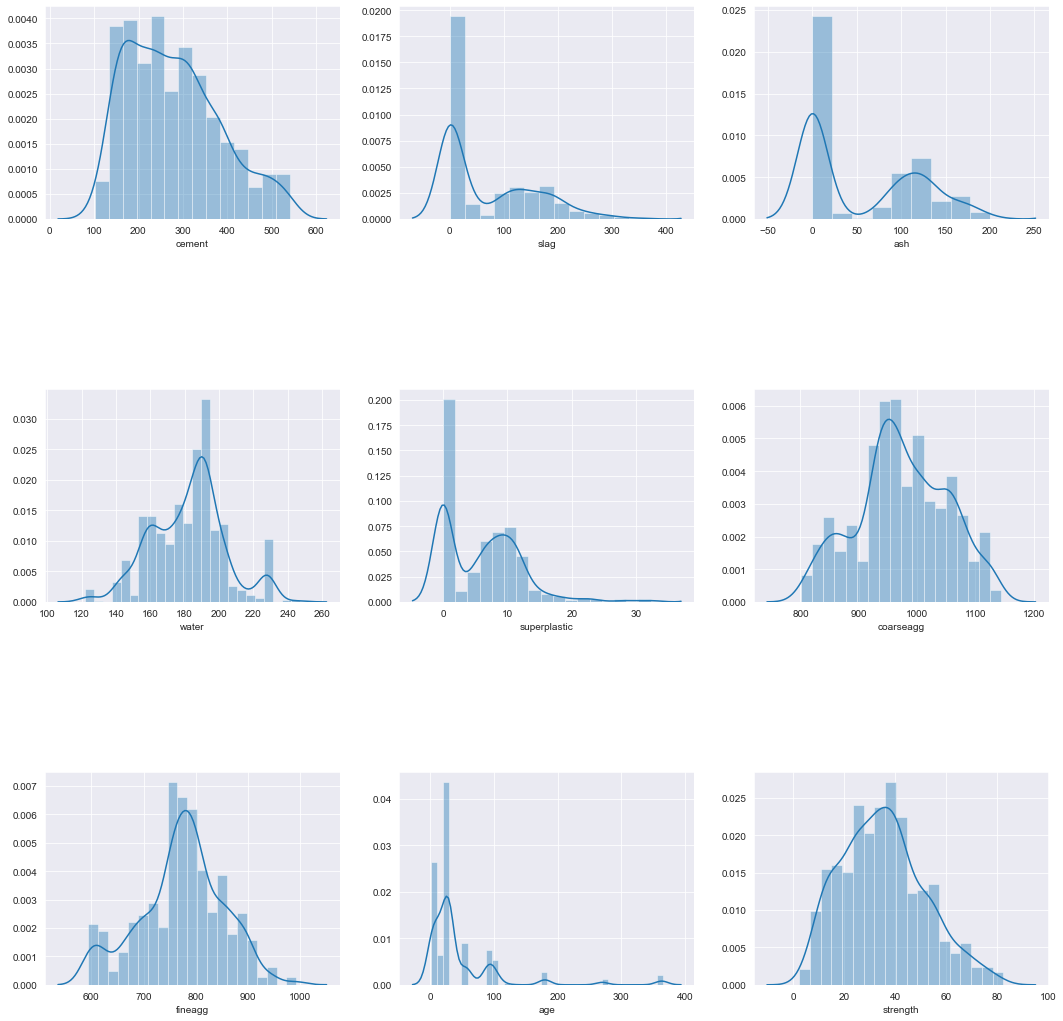

In [287]:
def showDistPlot (rows,cols,df):
    ## set the subplots count
    figsize_x = 18
    figsize_y = 18
    fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(figsize_x,figsize_y))
    plt.subplots_adjust(hspace=0.8, wspace=0.2)
    ## loop through the data frame columns
    for cols,ax in zip(df.columns,axes.flat):
        sns.distplot(df[cols], hist=True, ax=ax)
        ax.set(xlabel=cols)
        
showDistPlot (3,3,concrete_data) 

In [288]:
# Observation :
# There is a steady increase in the compressive strength of concrete with passing time.

In [289]:
# Multivariate Analysis

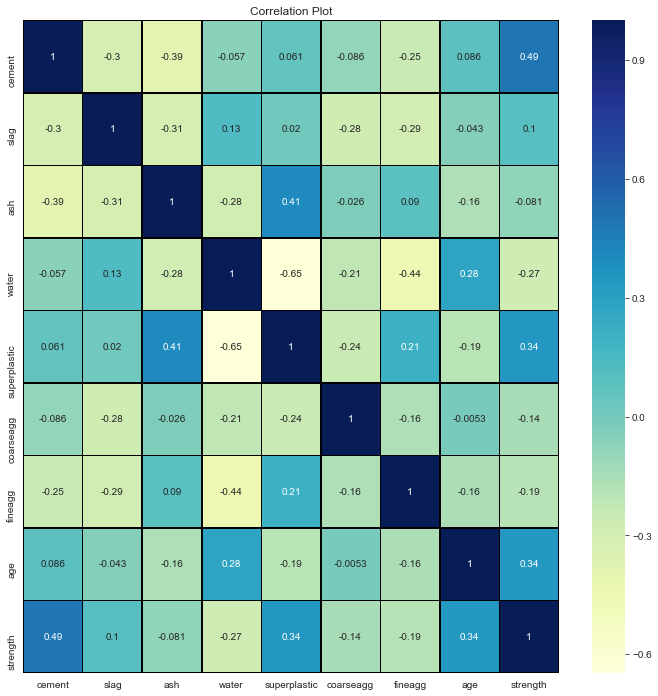

In [290]:
cp = concrete_data.corr()
plt.figure(figsize=(12,12))
with sns.axes_style("white"):
    sns.heatmap(cp,annot=True,linewidth=0.5,linecolor="black",cmap="YlGnBu")
plt.title("Correlation Plot")
plt.show()

In [291]:
# Observation :
# There is not much positive correlation between various predictors, however 'Cement' and 'Strength' have a decent positive correlation.
# There is a good negative correlation between 'Superplasticizer' and 'Water'.
# There is a decent negative correlation between 'Fineagg' and 'Water'.

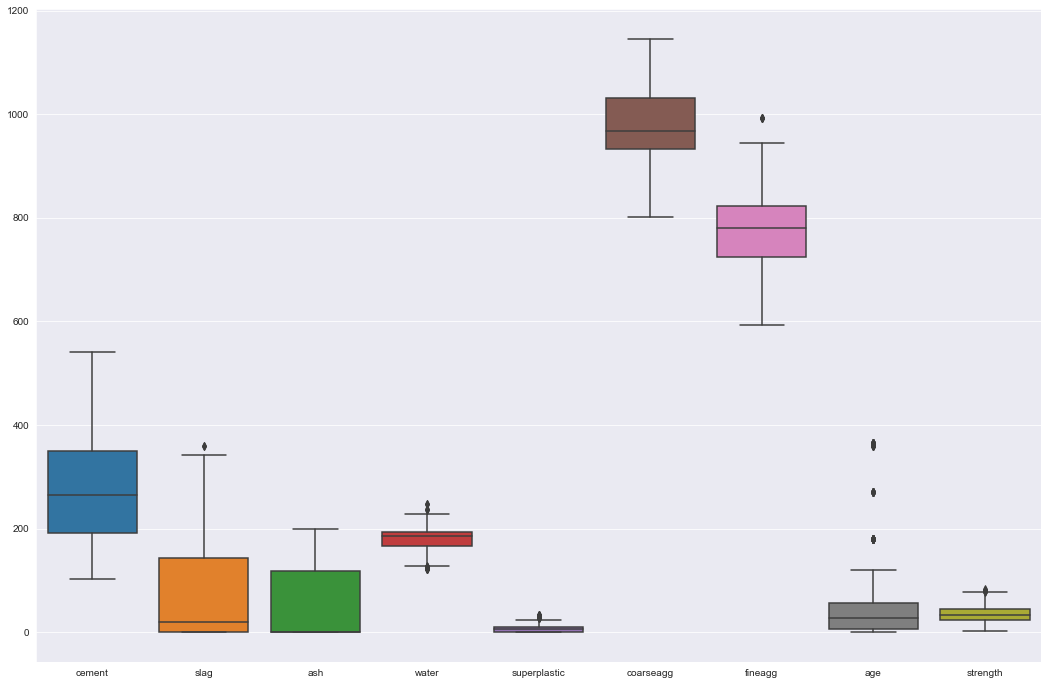

In [292]:
# study outliers using BoxPlots
def showBoxPlot():
    figsize_x = 18
    figsize_y = 12
    f,ax = plt.subplots(figsize=(figsize_x,figsize_y))
    sns.boxplot(data=concrete_data, ax =ax)
    plt.show();
    
showBoxPlot()

In [293]:
# Observation :
# cement - No outliers detected.
# slag - There are lot of zeros(0s) as there is no bottom whisker(min), with min and Q1 set at 0. Outliers detected on higher end.
# ash - There are lot of zeros(0s) as there is no bottom whisker(min) or Q1, with min, Q1, Q2 set at 0. No outliers detected.
# water - Outliers detected on both ends.
# superplastic - There are lot of zeros(0s) as there is no bottom whisker(min), with min and Q1 set at 0. Outliers detected on higher end.
# coarseagg - Looks uniformly distributed with no outliers detected.
# fineagg - Looks uniformly distributed with few outliers detected on higher end.
# age - Many outliers detected on higher end.
# strength - looks evenly distributed with few outliers detected on higher end.

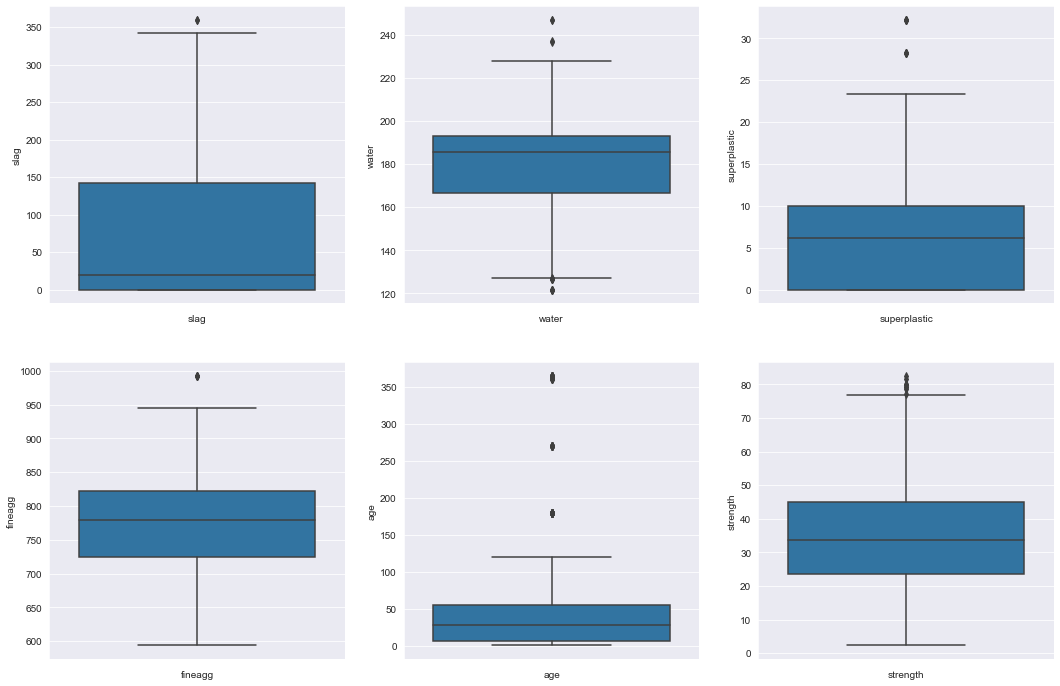

In [294]:
# study the outliers confirmed so far in further detail
# Function to show Boxplot of all the columns that can have outliers as per earlier observations
def studyOutliersInDetail (columns,df):
    rows = math.ceil(len(columns)/3)
    figsize_x = 18
    figsize_y = 12
    fig, axes = plt.subplots(ncols=3, nrows=rows, figsize=(figsize_x,figsize_y))
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    ## loop through the data frame columns
    for cols,ax in zip(columns,axes.flat):
        sns.boxplot(y=cols, data=df, ax=ax)
        ax.set(xlabel=cols)
    plt.show();

columns = ['slag','water','superplastic','fineagg','age','strength']
studyOutliersInDetail(columns,concrete_data)

In [295]:
#Number of outliers present in the dataset
print('Number of outliers in slag: ',concrete_data[((concrete_data.slag - concrete_data.slag.mean()) / concrete_data.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in water: ',concrete_data[((concrete_data.water - concrete_data.water.mean()) / concrete_data.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',concrete_data[((concrete_data.superplastic - concrete_data.superplastic.mean()) / concrete_data.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in fineagg: ',concrete_data[((concrete_data.fineagg - concrete_data.fineagg.mean()) / concrete_data.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',concrete_data[((concrete_data.age - concrete_data.age.mean()) / concrete_data.age.std()).abs() >3]['age'].count())
print('Number of outliers in strength: ',concrete_data[((concrete_data.strength - concrete_data.strength.mean()) / concrete_data.strength.std()).abs() >3]['age'].count())

Number of outliers in slag:  4
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in fineagg:  0
Number of outliers in age:  33
Number of outliers in strength:  0


In [296]:
# Observation :
# Since we can see outliers in 'slag','water','superplastic','fineagg','age' and 'strength' columns, we have used Standard deviation method to detect the outliers.If we have any data point that is more than 3 times the standard deviation, then those points are very likely to be outliers.

In [297]:
#Handling the outliers

#Replacing the outliers by median
for col_name in concrete_data.columns:
    q1 = concrete_data[col_name].quantile(0.25)
    q3 = concrete_data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    concrete_data[col_name][(concrete_data[col_name] < low) | (concrete_data[col_name] > high)] = concrete_data[col_name].mean()    

In [298]:
# Manually treating few of the remaining outliers
concrete_data['water'][concrete_data['water'] < 132] = concrete_data['water'].mean()
concrete_data['age'][concrete_data['age'] > 59.5] = concrete_data['age'].mean()
concrete_data['strength'][concrete_data['strength'] > 75.72] = concrete_data['strength'].mean()

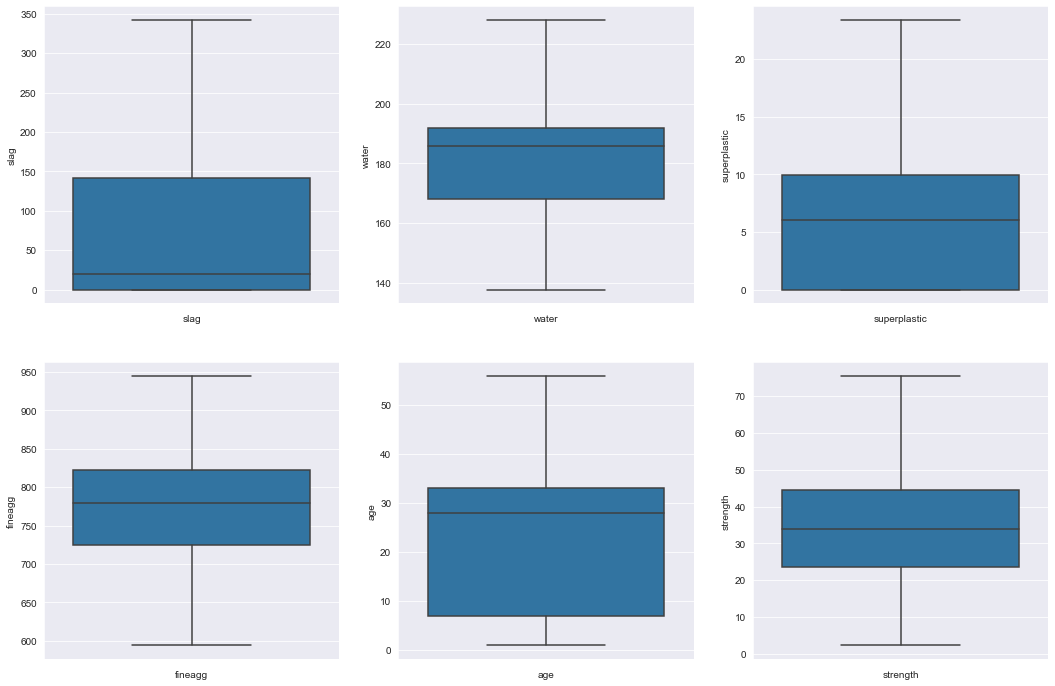

In [299]:
studyOutliersInDetail(columns,concrete_data)

In [300]:
# Observation :
# All the outliers are now removed, and the dataset is ready for further processing.

In [301]:
concrete_data.shape

(1005, 9)

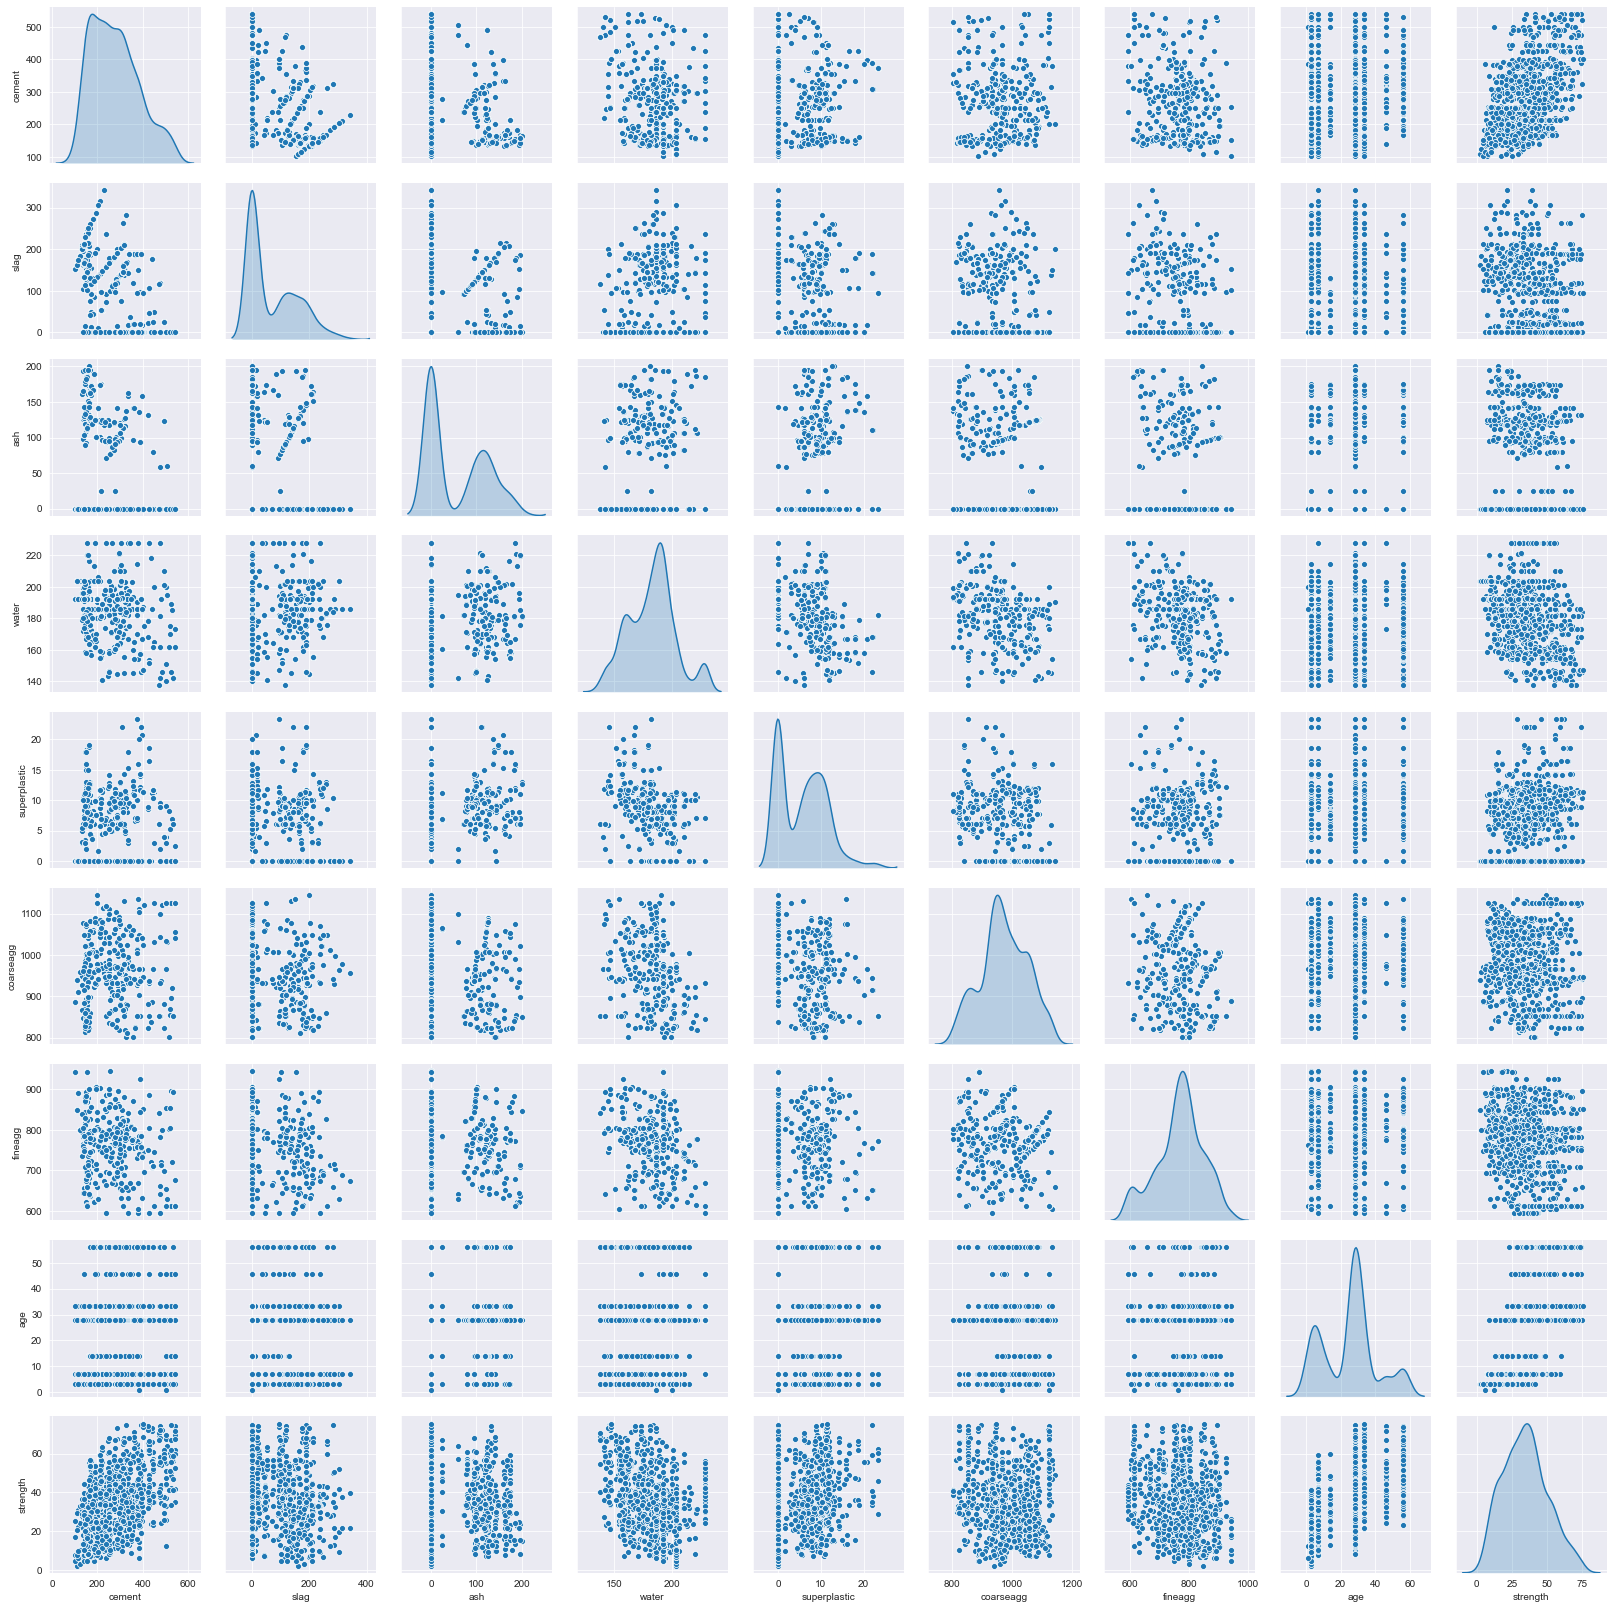

In [302]:
sns.pairplot(concrete_data, diag_kind='kde')

In [303]:
# Observation :
# cement and strength are normally distributed.
# Other features also looks gaussian with some of them having multiple minima and maxima
# From this, we can conclude there are likely 2-3 clusters of the data concentrations.
# Bivariate analysis between all columns denote no proper correlation between them as data points are randomly distributed.

In [304]:
concrete_data[concrete_data == 0].count(axis=0)

cement            0
slag            470
ash             541
water             0
superplastic    378
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

In [305]:
# Observation :
# This shows slag, ash and superplastic columns contain 0 values which will have to be replaced with mean on non-zero values of these columns.

In [306]:
concrete_data['slag'].replace(0,concrete_data[concrete_data != 0]['slag'].mean(), inplace=True)
concrete_data['ash'].replace(0,concrete_data[concrete_data != 0]['ash'].mean(), inplace=True)
concrete_data['superplastic'].replace(0,concrete_data[concrete_data != 0]['superplastic'].mean(), inplace=True)

In [307]:
concrete_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.700000,265.000000,349.000000,540.0
slag,1005.0,134.259789,52.617006,11.00,129.900000,134.259789,141.300000,342.1
ash,1005.0,120.288793,22.868480,24.50,120.288793,120.288793,120.288793,200.1
water,1005.0,182.522784,20.034403,137.80,168.000000,185.700000,192.000000,228.0
superplastic,1005.0,9.285060,2.980108,1.70,8.000000,9.285060,9.900000,23.4
coarseagg,1005.0,974.376816,77.579667,801.00,932.000000,968.000000,1031.000000,1145.0
fineagg,1005.0,771.594170,78.819698,594.00,724.300000,779.300000,822.000000,945.0
age,1005.0,25.416345,15.165997,1.00,7.000000,28.000000,33.165718,56.0
strength,1005.0,34.811983,15.674604,2.33,23.520000,33.800000,44.400000,75.5


In [308]:
# Scaling the data
std_scale = StandardScaler()
cols = concrete_data.columns
concrete_data_scaled = std_scale.fit_transform(concrete_data)
concrete_data_scaled = pd.DataFrame(concrete_data_scaled, columns=cols)
concrete_data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,-1.838220e-16,1.000498,-1.693618,-8.431237e-01,-1.307032e-01,6.747251e-01,2.506116
slag,1005.0,2.788262e-16,1.000498,-2.343751,-8.290018e-02,0.000000e+00,1.338677e-01,3.952024
ash,1005.0,5.042732e-16,1.000498,-4.190768,-6.217261e-16,-6.217261e-16,-6.217261e-16,3.491747
water,1005.0,-4.067504e-16,1.000498,-2.233411,-7.252532e-01,1.586670e-01,4.732826e-01,2.271086
superplastic,1005.0,-5.105630e-16,1.000498,-2.546497,-4.314271e-01,-1.192736e-15,2.064511e-01,4.738744
coarseagg,1005.0,1.174737e-15,1.000498,-2.235936,-5.465081e-01,-8.223793e-02,7.302348e-01,2.200424
fineagg,1005.0,4.480661e-16,1.000498,-2.254292,-6.003286e-01,9.781395e-02,6.398264e-01,2.201127
age,1005.0,2.618138e-16,1.000498,-1.610742,-1.214923e+00,1.704432e-01,5.112246e-01,2.017598
strength,1005.0,1.646002e-16,1.000498,-2.073300,-7.207586e-01,-6.459408e-02,6.119958e-01,2.597085


In [309]:
# Splitting the dataset into predictor columns and target column
X=concrete_data_scaled.iloc[:,:8]
y=concrete_data_scaled.iloc[:,8]

In [310]:
# Split the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.30, random_state=10)

In [311]:
# KMeans Clustering - To create clusters and analyze the data

#Finding optimal no. of clusters

def find_optimal_clusters(model):
    clusters=range(1,10)
    meanDistortions=[]

    for k in clusters:
        model=KMeans(n_clusters=k)
        model.fit(X)
        prediction=model.predict(X)
        meanDistortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])


    plt.plot(clusters, meanDistortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Average distortion')
    plt.title('Selecting k with the Elbow Method')

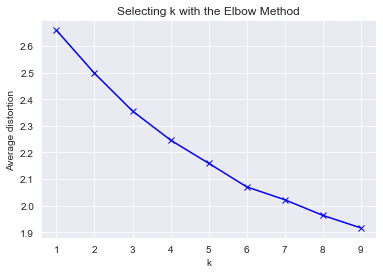

In [312]:
kmeans = KMeans(n_jobs=-1, random_state=10)
find_optimal_clusters(kmeans)

In [313]:
# Setting to 3 clusters
kmeans = KMeans(n_jobs=-1, n_clusters=3, random_state=10)
kmeans.fit(X, y)  
y_pred = kmeans.predict(X)

In [314]:
# Algorithm, Model and Hypertuning

def find_best_model_gridsearch(model, parameters, X_train, y_train):
    clf = GridSearchCV(model, parameters)
    clf.fit(X_train, y_train)             
    print(clf.best_score_)
    print(clf.best_params_)
    print(clf.best_estimator_)
    return clf

In [315]:
def find_best_model_randomsearch(model, parameters, X_train, y_train):
    clf = RandomizedSearchCV(model, parameters, n_jobs=-1, n_iter=50, random_state=10)
    clf.fit(X_train, y_train)             
    print(clf.best_score_)
    print(clf.best_params_)
    print(clf.best_estimator_)
    return clf

In [316]:
def show_accuracy(y_train, y_train_pred, y_test, y_test_pred):
    #get Precision Score on train and test
    accuracy_train = round(metrics.r2_score(y_train, y_train_pred),3)
    accuracy_test = round(metrics.r2_score(y_test, y_test_pred),3)
    
    accdf = pd.DataFrame([[accuracy_train],[accuracy_test]], index=['Training', 'Testing'], columns=['Accuracy'])  
    display(accdf)
    return accdf

In [317]:
def model_show_feature_importance(model, X_train, feature_importance=False):
    f, axes = plt.subplots(1, 1, figsize=(20, 10))
    
    if (not feature_importance):
        coef = pd.DataFrame(model.coef_.ravel())
    elif (feature_importance):
        coef = pd.DataFrame(model.feature_importances_)
    
    coef["feat"] = X_train.columns
    bplot = sns.barplot(coef["feat"],coef[0],palette="Set1",linewidth=2,edgecolor="k", ax=axes)    
    bplot.set_facecolor("white")
    bplot.axhline(0,color="k",linewidth=2)
    bplot.set_ylabel("coefficients/weights", fontdict=dict(fontsize=20))
    bplot.set_xlabel("features", fontdict=dict(fontsize=20))
    bplot.set_title('FEATURE IMPORTANCES')
    bplot.set_xticklabels(rotation=60, labels=bplot.get_xticklabels(),fontweight='demibold',fontsize='x-large')

In [318]:
def model_fit_predict_score(model, X_train, y_train, X_test, y_test):    
    model.fit(X_train, y_train)    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    model_result = show_accuracy(y_train, y_train_pred, y_test, y_test_pred)
    return model_result

In [319]:
def crossvalidation(model, X_train, y_train):
    kfold = KFold(n_splits=20, random_state=10)
    results = cross_val_score(model, X_train, y_train, cv=kfold, n_jobs=-1)
    display(results)
    kfold_result = pd.DataFrame([[results.mean()*100.0, results.std()*100.0]], index=['KFold'], columns=['Mean Accuracy', 'Standard Deviation'])
    display(kfold_result)
    return results

In [320]:
def model_confidence_interval(stats, alpha = 0.95):
    sns.distplot(stats, color='blue')
    
    # confidence intervals    
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(stats, p))
    print('**Model performance range at %.0f%% confidence interval is between %.1f%% and %.1f%%**' % (alpha*100, lower*100, upper*100))

In [321]:
def get_important_features(model, X_train, y_train, k_features):
    sfs1 = sfs(model, k_features=k_features, forward=True, scoring='r2', cv=5)
    sfs1 = sfs1.fit(X_train.values, y_train.values)
    fig = plot_sfs(sfs1.get_metric_dict())

    plt.title('Sequential Forward Selection (w. R^2)')
    plt.grid()
    plt.show()

    columnList = list(X_train.columns)
    feat_cols_idx = list(sfs1.k_feature_idx_)
    subsetColumnList = [columnList[i] for i in feat_cols_idx] 
    display(pd.DataFrame(subsetColumnList, columns=['Selected Columns'], index=feat_cols_idx))
    return subsetColumnList

In [322]:
def model_fit_predict_score_only_important_features(model, X_train, y_train, X_test, y_test, k_features = 'best'):    
    subsetColumnList = get_important_features(model, X_train, y_train, k_features=k_features)    
    model.fit(X_train[subsetColumnList], y_train)
    
    y_train_pred = model.predict(X_train[subsetColumnList])
    y_test_pred = model.predict(X_test[subsetColumnList])
    model_result = show_accuracy(y_train, y_train_pred, y_test, y_test_pred)
    return model_result

In [323]:
# Linear Regression
lr = LinearRegression(n_jobs=-1)
lr_result = model_fit_predict_score(lr, X_train, y_train, X_test, y_test)

,Accuracy
Training,0.691
Testing,0.744


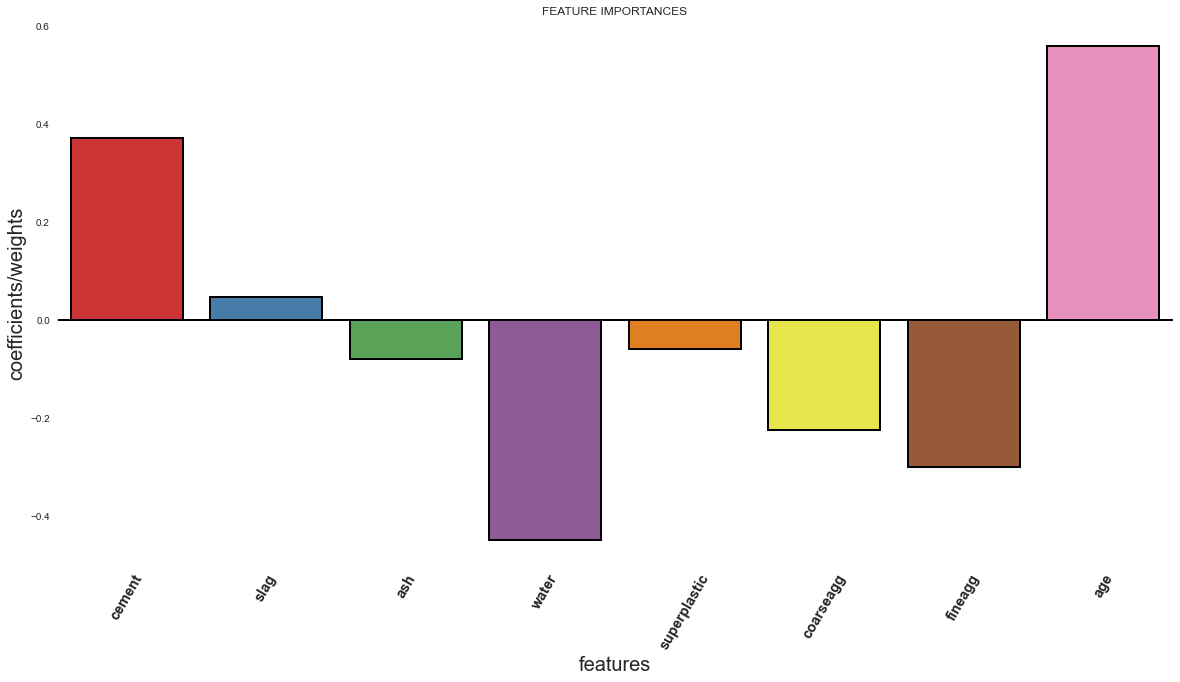

In [324]:
model_show_feature_importance(lr, X_train)

In [325]:
# Observation : 
# Important features are denoted by coefficients having values greater than (+ or -)0.3

# cement
# water
# fineagg
# age

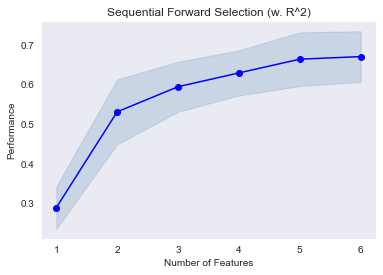

,Selected Columns
0,cement
2,ash
3,water
5,coarseagg
6,fineagg
7,age


,Accuracy
Training,0.687
Testing,0.744


In [326]:
lr_result_imp_feat = model_fit_predict_score_only_important_features(lr, X_train, y_train, X_test, y_test, k_features=6)

In [327]:
# Observation :
# Even after reducing dimensions to 6, we can still see same accuracy results

In [328]:
# Lasso Cross Validation 

lasso = LassoCV(n_jobs=-1,random_state=10)
lasso_result = model_fit_predict_score(lasso, X_train, y_train, X_test, y_test)

,Accuracy
Training,0.691
Testing,0.744


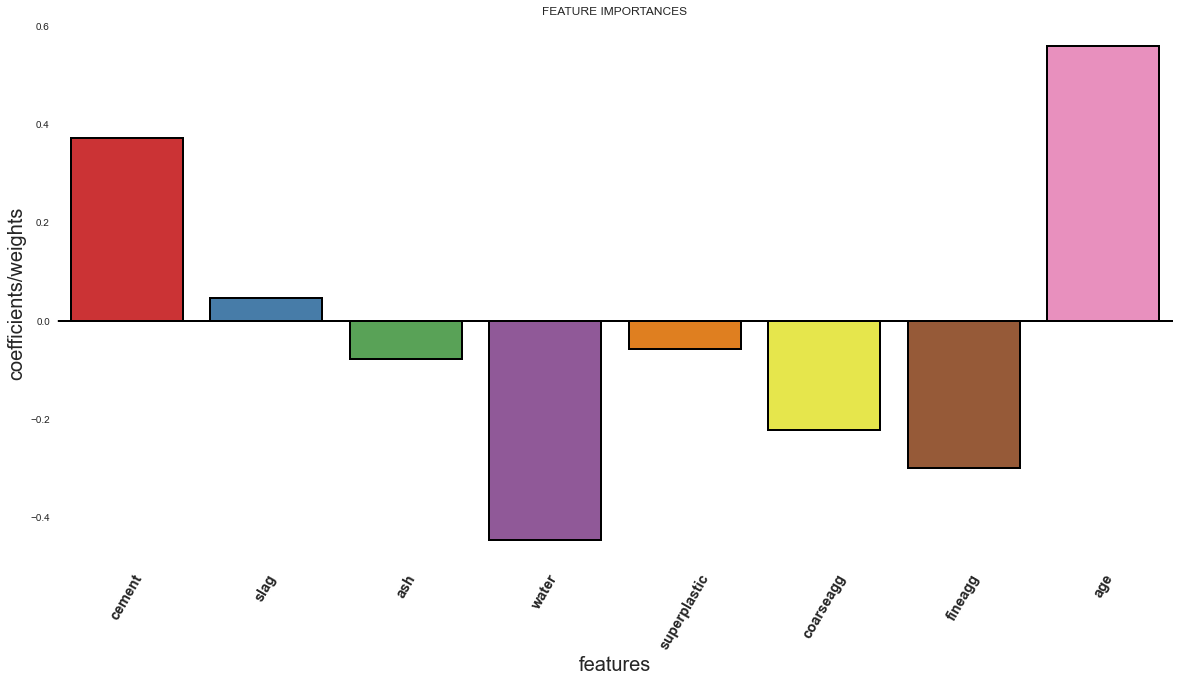

In [329]:
# Show Feature Importance
model_show_feature_importance(lasso, X_train)

In [330]:
# Observation :
# Important features are denoted by coefficients having values greater than (+ or -)0.3

# cement
# water
# fineagg
# age

In [331]:
display(np.round(lasso.coef_, 1))
display(np.round(lasso.intercept_, 3))

array([ 0.4,  0. , -0.1, -0.4, -0.1, -0.2, -0.3,  0.6])

-0.0

In [332]:
coeff= np.round(lasso.coef_, 3)
len(coeff[coeff > 0])

3

In [333]:
# Conclusion :
# Lasso model reduced the dimensions to 3 and still produced very good accuracy

array([0.75644983, 0.60343888, 0.62704745, 0.65136239, 0.49222482,
       0.65657735, 0.61925017, 0.44581826, 0.65887824, 0.72784277,
       0.65957661, 0.66445204, 0.69020726, 0.58597789, 0.80982095,
       0.74815228, 0.74104904, 0.72078426, 0.61519826, 0.85042291])

,Mean Accuracy,Standard Deviation
KFold,66.622658,9.443144


**Model performance range at 95% confidence interval is between 46.8% and 83.1%**


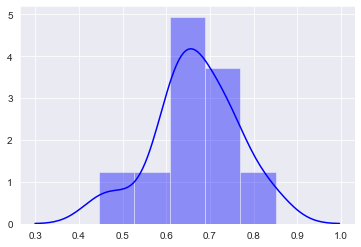

In [334]:
# Cross-Validation and Model Performance at 95% Confidence Interval
stats = crossvalidation(lasso, X_train, y_train)
model_confidence_interval(stats)

In [335]:
# Polynomial Features
# Creating polynomial features of higher degree as we saw many curvy-linear relationships

poly2 = PolynomialFeatures(2)
X_poly2 = poly2.fit_transform(X)

In [336]:
X_train_poly2, X_test_poly2, y_train_poly2, y_test_poly2 = train_test_split(X_poly2, y, test_size =.30, random_state=10)

In [337]:
lr_poly2_result = model_fit_predict_score(lr, X_train_poly2, y_train_poly2, X_test_poly2, y_test_poly2)

,Accuracy
Training,0.784
Testing,0.748


In [338]:
# Observation :
# There has not been a significant improvement in accuracy over Linear Regression model.

In [339]:
# Polynomial Features - setting the degree to 2
lasso_poly2_result = model_fit_predict_score(lasso, X_train_poly2, y_train_poly2, X_test_poly2, y_test_poly2)

,Accuracy
Training,0.783
Testing,0.755


In [340]:
# Observation :
# There is a considerable improvement in performance when using LassoCV with Polynomial Features of degree 2.

array([0.75733941, 0.60308699, 0.62751535, 0.65151565, 0.49224701,
       0.65446075, 0.61803725, 0.44302944, 0.65844927, 0.72887427,
       0.65975582, 0.664005  , 0.68771489, 0.58457776, 0.81335681,
       0.75011128, 0.74164476, 0.71980372, 0.61532704, 0.84977176])

,Mean Accuracy,Standard Deviation
KFold,66.603121,9.519221


**Model performance range at 95% confidence interval is between 46.6% and 83.2%**


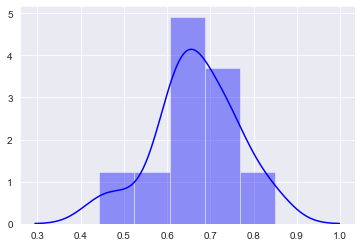

In [341]:
# Cross-Validation and Model Performance at 95% Confidence Interval
stats = crossvalidation(lr, X_train, y_train)
model_confidence_interval(stats, alpha=0.95)

In [342]:
# Principal Component Analysis (PCA) with all attributes

pca_full = PCA(n_components=45)
pca_full.fit(X_poly2)

PCA(copy=True, iterated_power='auto', n_components=45, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Explained Variance')

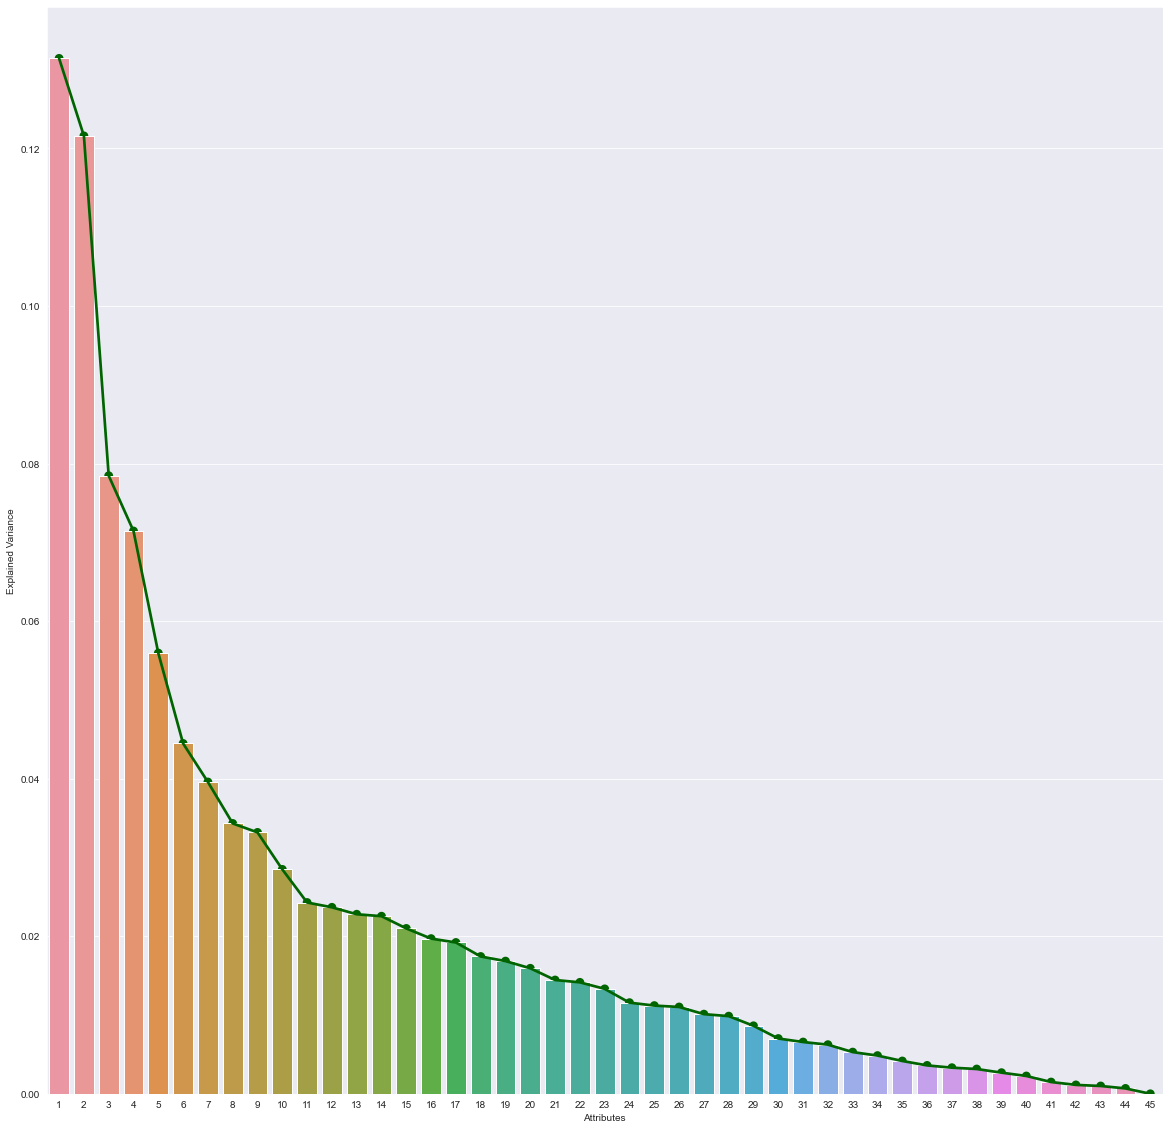

In [343]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sns.barplot(list(range(1,46)), pca_full.explained_variance_ratio_,ax=axes)
plot = sns.pointplot(list(range(1,46)), pca_full.explained_variance_ratio_,ax=axes, color='darkgreen')
plot.set_xlabel('Attributes')
plot.set_ylabel('Explained Variance')

In [344]:
# PCA with selected attributes
pca = PCA(n_components=30)
X_poly2_PCA = pca.fit_transform(X_poly2)

In [345]:
X_train_poly2_PCA, X_test_poly2_PCA, y_train_poly2_PCA, y_test_poly2_PCA = train_test_split(X_poly2_PCA, y, test_size =.30, random_state=10)

In [346]:
lr_poly2_result = model_fit_predict_score(lr, X_train_poly2_PCA, y_train_poly2_PCA, X_test_poly2_PCA, y_test_poly2_PCA)

,Accuracy
Training,0.689
Testing,0.675


In [347]:
# Observation :
# Adding polynomial features of degree 2 increased number of features to 45. Reducing it 30 resulted in a bad accuracy.

In [348]:
# Polynomial features with degree = 3
poly3 = PolynomialFeatures(3)
X_poly3 = poly3.fit_transform(X)

In [349]:
X_train_poly3, X_test_poly3, y_train_poly3, y_test_poly3 = train_test_split(X_poly3, y, test_size =.30, random_state=10)

In [350]:
lr_poly3_result = model_fit_predict_score(lr, X_train_poly3, y_train_poly3, X_test_poly3, y_test_poly3)

,Accuracy
Training,0.881
Testing,0.686


In [351]:
# Polynomial Features - setting the degree to 3
lasso_poly3_result = model_fit_predict_score(lasso, X_train_poly3, y_train_poly3, X_test_poly3, y_test_poly3)

,Accuracy
Training,0.844
Testing,0.789


In [352]:
# Observation :
# Here LassoCV is performing better as compared to Linear Regression. 

In [353]:
pca_full = PCA(n_components=45)
pca_full.fit(X_poly3)

PCA(copy=True, iterated_power='auto', n_components=45, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Explained Variance')

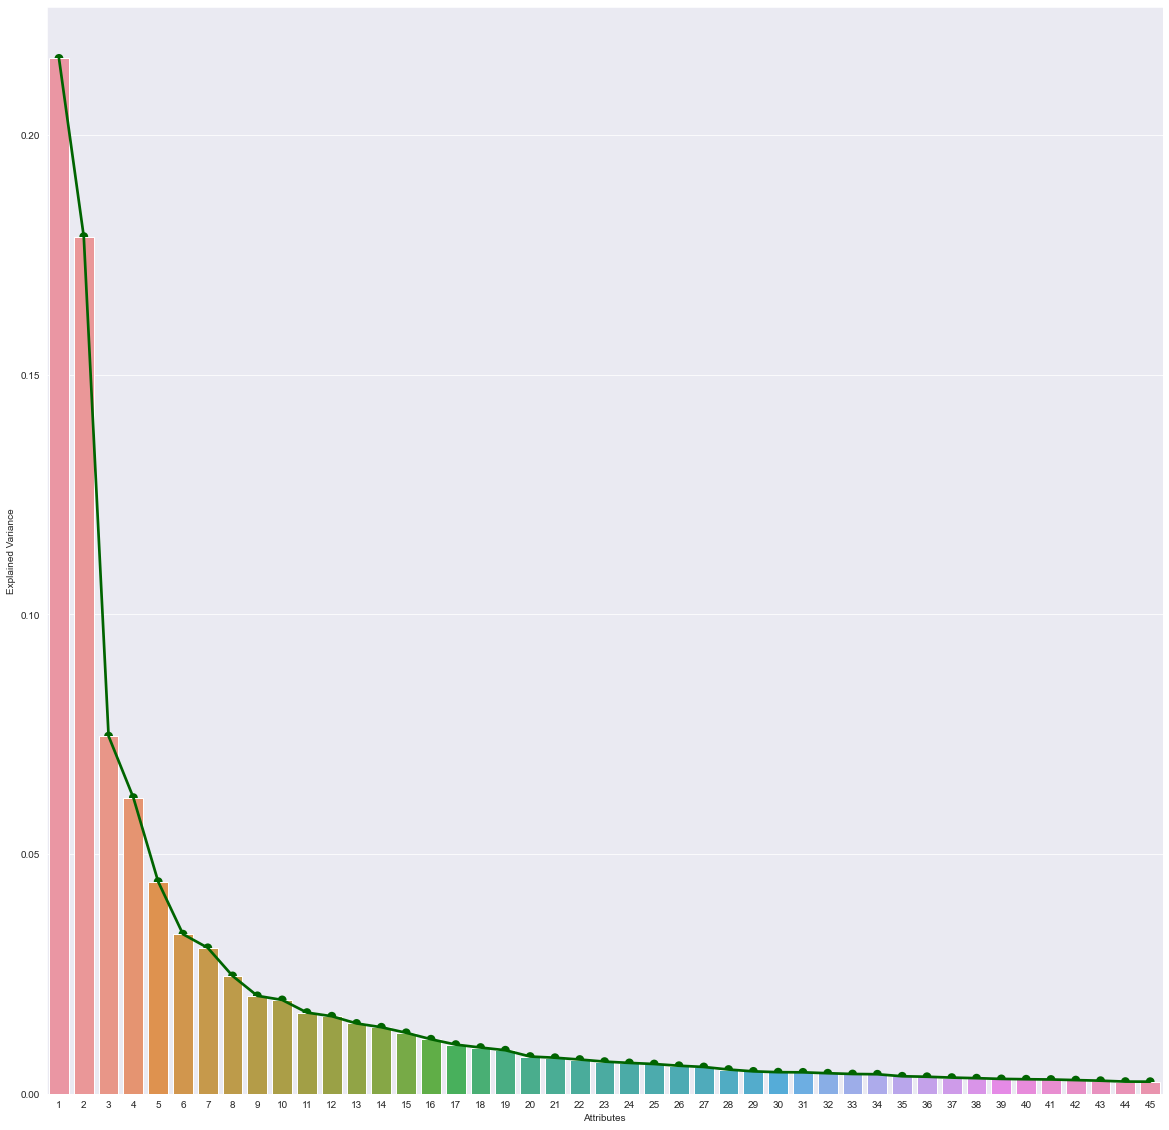

In [354]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sns.barplot(list(range(1,46)), pca_full.explained_variance_ratio_,ax=axes)
plot = sns.pointplot(list(range(1,46)), pca_full.explained_variance_ratio_,ax=axes, color='darkgreen')
plot.set_xlabel('Attributes')
plot.set_ylabel('Explained Variance')

In [355]:
# PCA with selected attributes
pca = PCA(n_components=30)
X_poly3_PCA = pca.fit_transform(X_poly3)

In [356]:
X_train_poly3_PCA, X_test_poly3_PCA, y_train_poly3_PCA, y_test_poly3_PCA = train_test_split(X_poly3_PCA, y, test_size =.30, random_state=10)

In [357]:
lr_poly3_result = model_fit_predict_score(lr, X_train_poly3_PCA, y_train_poly3_PCA, X_test_poly3_PCA, y_test_poly3_PCA)

,Accuracy
Training,0.530
Testing,0.579


In [359]:
# Observation :
# With increasing degree of polynomial, the performance of the model is degrading.

In [360]:
# Polynomial features with degree = 4
poly4 = PolynomialFeatures(4)
X_poly4 = poly4.fit_transform(X)

In [361]:
X_train_poly4, X_test_poly4, y_train_poly4, y_test_poly4 = train_test_split(X_poly4, y, test_size =.30, random_state=10)

In [362]:
lr_poly4_result = model_fit_predict_score(lr, X_train_poly4, y_train_poly4, X_test_poly4, y_test_poly4)

,Accuracy
Training,0.982
Testing,-2143786.381


In [363]:
# Polynomial Features - setting the degree to 2
lasso_poly4_result = model_fit_predict_score(lasso, X_train_poly4, y_train_poly4, X_test_poly4, y_test_poly4)

,Accuracy
Training,0.838
Testing,0.763


In [364]:
pca_full = PCA(n_components=45)
pca_full.fit(X_poly4)

PCA(copy=True, iterated_power='auto', n_components=45, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Explained Variance')

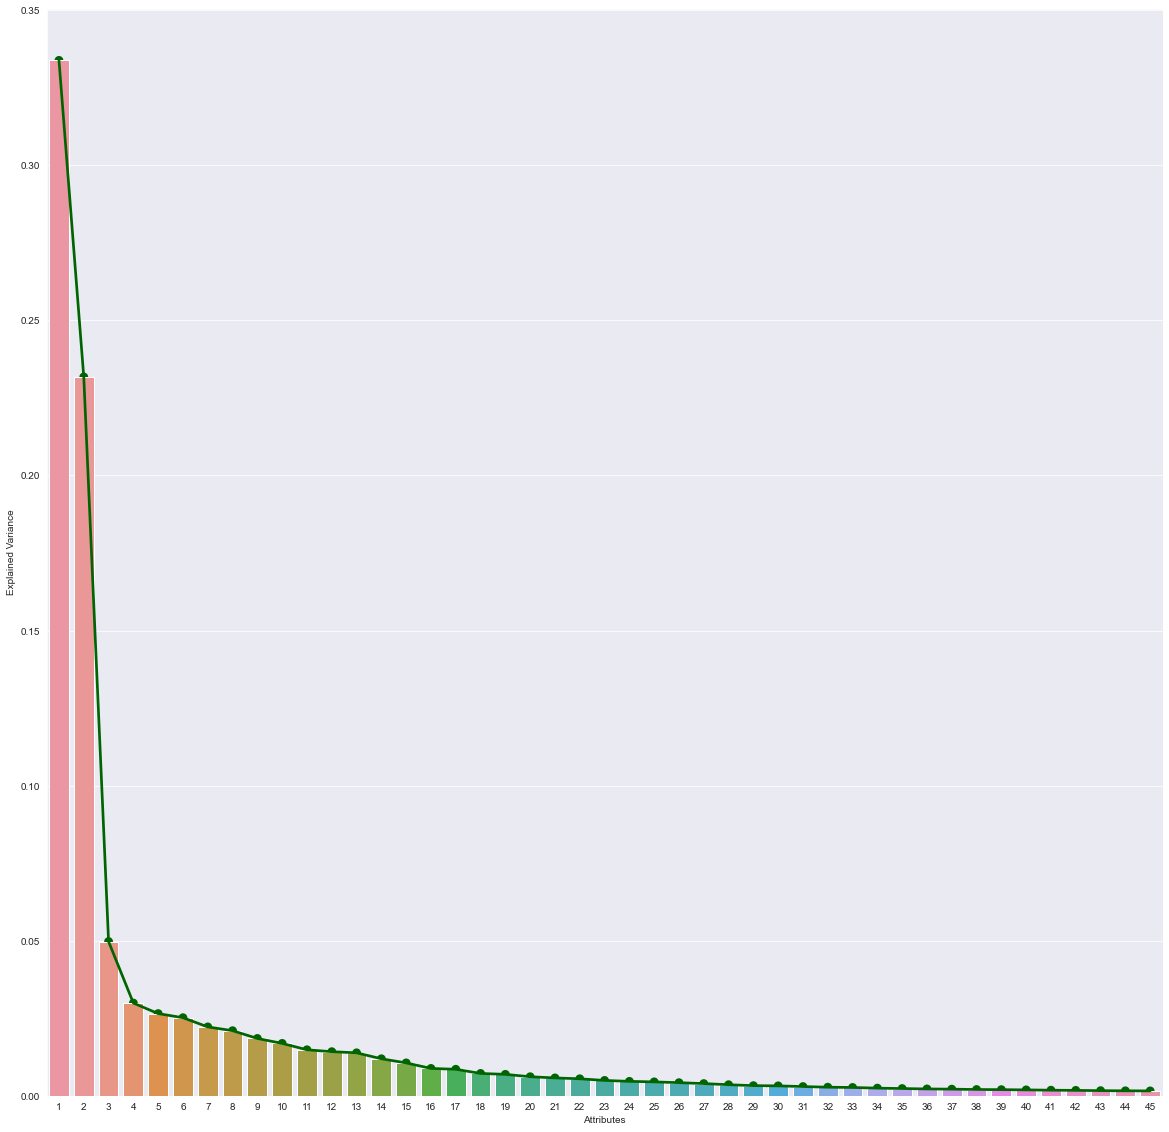

In [365]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sns.barplot(list(range(1,46)), pca_full.explained_variance_ratio_,ax=axes)
plot = sns.pointplot(list(range(1,46)), pca_full.explained_variance_ratio_,ax=axes, color='darkgreen')
plot.set_xlabel('Attributes')
plot.set_ylabel('Explained Variance')

In [366]:
# PCA with selected attributes
pca = PCA(n_components=30)
X_poly4_PCA = pca.fit_transform(X_poly4)

In [367]:
X_train_poly4_PCA, X_test_poly4_PCA, y_train_poly4_PCA, y_test_poly4_PCA = train_test_split(X_poly4_PCA, y, test_size =.30, random_state=10)

In [368]:
lr_poly4_result = model_fit_predict_score(lr, X_train_poly4_PCA, y_train_poly4_PCA, X_test_poly4_PCA, y_test_poly4_PCA)

,Accuracy
Training,0.302
Testing,0.257


In [369]:
# Conclusion :
# Beyond this, the model does not perform well. From this it is clear that the model is non linear. 
# Thus we proceed to other non-linear models.

In [370]:
# Decision Tree Regressor

dtree = DecisionTreeRegressor(random_state=10)
dtree_result1 = model_fit_predict_score(dtree, X_train, y_train, X_test, y_test)

,Accuracy
Training,0.995
Testing,0.767


In [371]:
# Observation :
# This seems to overfit the data. Let us try hupertuning max-depth parameter

In [372]:
dtree = DecisionTreeRegressor(random_state=10, min_samples_leaf=15)
dtree_result1 = model_fit_predict_score(dtree, X_train, y_train, X_test, y_test)

,Accuracy
Training,0.79
Testing,0.72


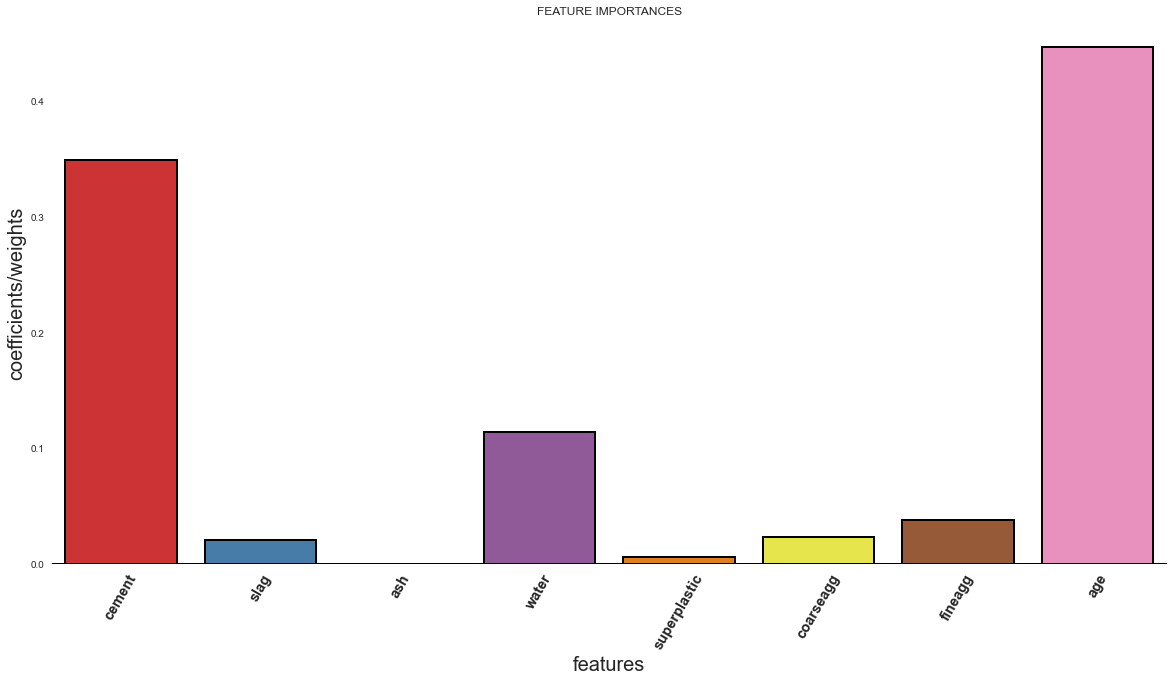

In [373]:
# Show feature importance
model_show_feature_importance(dtree, X_train, True)

In [374]:
# Observation :
# age is given more weightage, followed by cement,as compared to other features. All Other features are more or less having similar weightage.

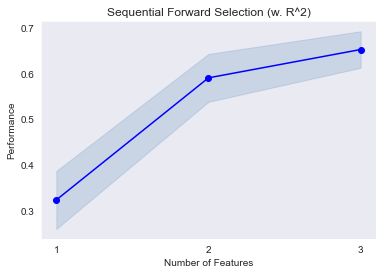

,Selected Columns
0,cement
3,water
7,age


,Accuracy
Training,0.757
Testing,0.686


In [375]:
# Dimentionality Reduction using Sequential Feature Selector
dtree_result1_imp_feat = model_fit_predict_score_only_important_features(dtree, X_train, y_train, X_test, y_test, k_features=3)

In [376]:
# Observation :
# Even after reducing dimensions to 3, we can still see good accuracy results relative to hypertuned and untuned 
# decision tree regressor model. 

array([0.68303398, 0.65510668, 0.50213201, 0.72175567, 0.56599231,
       0.59585047, 0.63869645, 0.48766182, 0.65171117, 0.70421848,
       0.77504802, 0.47841633, 0.77546655, 0.63409045, 0.8254149 ,
       0.73731078, 0.68864812, 0.7148689 , 0.70158952, 0.79726653])

,Mean Accuracy,Standard Deviation
KFold,66.671396,9.784543


**Model performance range at 95% confidence interval is between 48.3% and 81.2%**


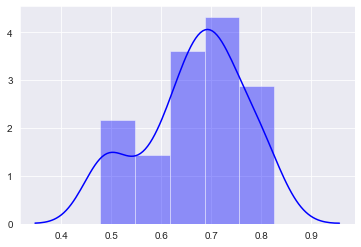

In [377]:
# Cross-Validation and Model Performance at 95% Confidence Interval
stats = crossvalidation(dtree, X_train, y_train)
model_confidence_interval(stats)

In [378]:
# RandomForest Regressor

rfor = RandomForestRegressor(n_jobs=-1)
rfor_result1 = model_fit_predict_score(rfor, X_train, y_train, X_test, y_test)

,Accuracy
Training,0.962
Testing,0.843


In [379]:
# Observation :
# This seems to overfit the data with accuracy of 96% for training set and 84% for test set. Let us try tuning parameters.

In [380]:
rfor = RandomForestRegressor(n_jobs=-1, max_depth=5, max_features=8)
rfor_result1 = model_fit_predict_score(rfor, X_train, y_train, X_test, y_test)

,Accuracy
Training,0.835
Testing,0.768


In [381]:
# Randomized Search to find better model
params = dict(n_estimators=range(50, 500, 50), max_depth = range(3, 20, 1), min_samples_leaf=range(1, 5, 1), max_features=('auto', 'sqrt', 'log2', None))
clf = find_best_model_randomsearch(rfor, params, X_train, y_train)

0.8312255370251601
{'n_estimators': 150, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 15}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)


In [382]:
rfor = clf.best_estimator_
rfor.max_depth=14
rfor_result1 = model_fit_predict_score(rfor, X_train, y_train, X_test, y_test)

,Accuracy
Training,0.975
Testing,0.857


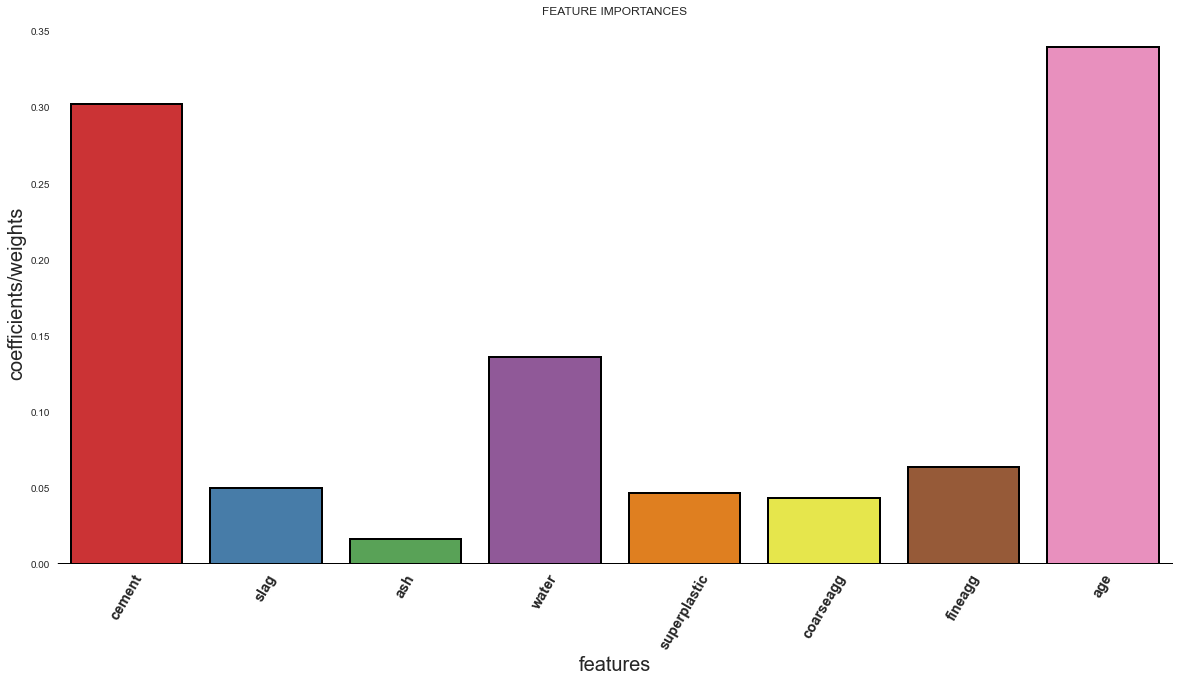

In [383]:
# Show Feature Importance
model_show_feature_importance(rfor, X_train, True)

In [384]:
# Observation :
# cement, water and age are given more weightage compared to other features. 
# All Other features are more or less having similar weightage.

array([0.90862524, 0.82351162, 0.77991432, 0.71079316, 0.74431723,
       0.86214985, 0.76023838, 0.78049652, 0.86465009, 0.88522577,
       0.88667622, 0.81204322, 0.87785735, 0.82925484, 0.93467379,
       0.78928701, 0.85555921, 0.78299328, 0.92069131, 0.88629435])

,Mean Accuracy,Standard Deviation
KFold,83.476264,6.128976


**Model performance range at 95% confidence interval is between 72.7% and 92.8%**


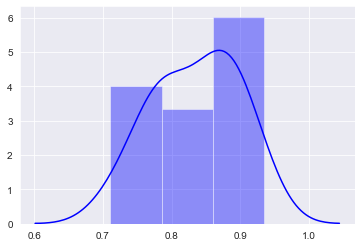

In [385]:
# Cross-Validation and Model Performance at 95% Confidence Interval
stats = crossvalidation(rfor, X_train, y_train)
model_confidence_interval(stats)

In [386]:
# Gradient Boosting Regressor

gboost = GradientBoostingRegressor(random_state=10)
gboost_result1 = model_fit_predict_score(gboost, X_train, y_train, X_test, y_test)

,Accuracy
Training,0.927
Testing,0.860


In [387]:
# Observation :
# This already seems to be a good model but slightly overfitting the training data. Let us try hypertuning the parameters.

In [388]:
gboost = GradientBoostingRegressor(random_state=10, n_estimators=100, min_samples_split=10, min_samples_leaf=30)
gboost_result1 = model_fit_predict_score(gboost, X_train, y_train, X_test, y_test)

,Accuracy
Training,0.902
Testing,0.857


In [389]:
# Observation :
# This seems to be a good model with overfitting reduced and accuracy difference between train and test better than 
# untuned model.

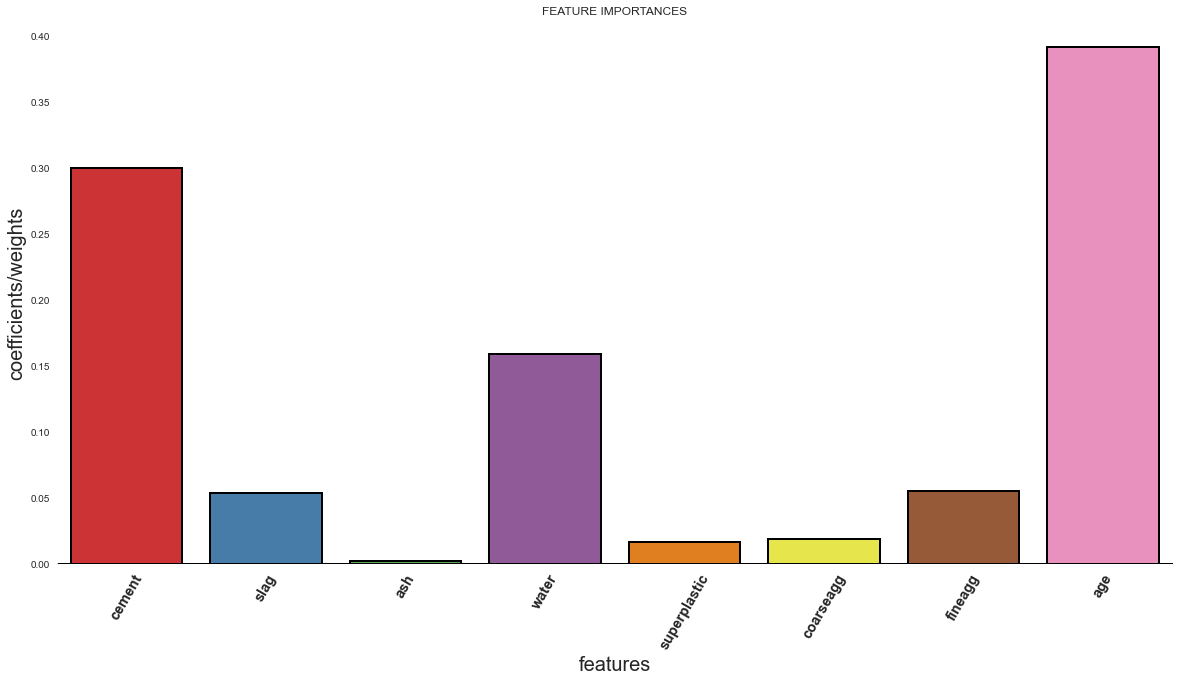

In [390]:
# Show Feature Importance
model_show_feature_importance(gboost, X_train, True)

In [391]:
# Observation :
# age has the highest importance amongst features followed by cement and then water.

array([0.9019755 , 0.81026389, 0.81649606, 0.7641385 , 0.71366032,
       0.86956499, 0.83982196, 0.78013242, 0.81160672, 0.88682769,
       0.88535072, 0.79721521, 0.84111363, 0.77653157, 0.92474021,
       0.81531392, 0.86913521, 0.86560103, 0.86278165, 0.88639837])

,Mean Accuracy,Standard Deviation
KFold,83.593348,5.196342


**Model performance range at 95% confidence interval is between 73.8% and 91.4%**


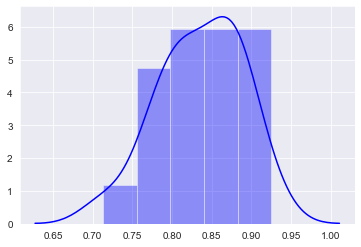

In [392]:
# Cross-Validation and Model Performance at 95% Confidence Interval :
stats = crossvalidation(gboost, X_train, y_train)
model_confidence_interval(stats)

In [393]:
# AdaBoostRegressor

adaBoost = AdaBoostRegressor(random_state=10)
adaBoost_result1 = model_fit_predict_score(adaBoost, X_train, y_train, X_test, y_test)

,Accuracy
Training,0.755
Testing,0.733


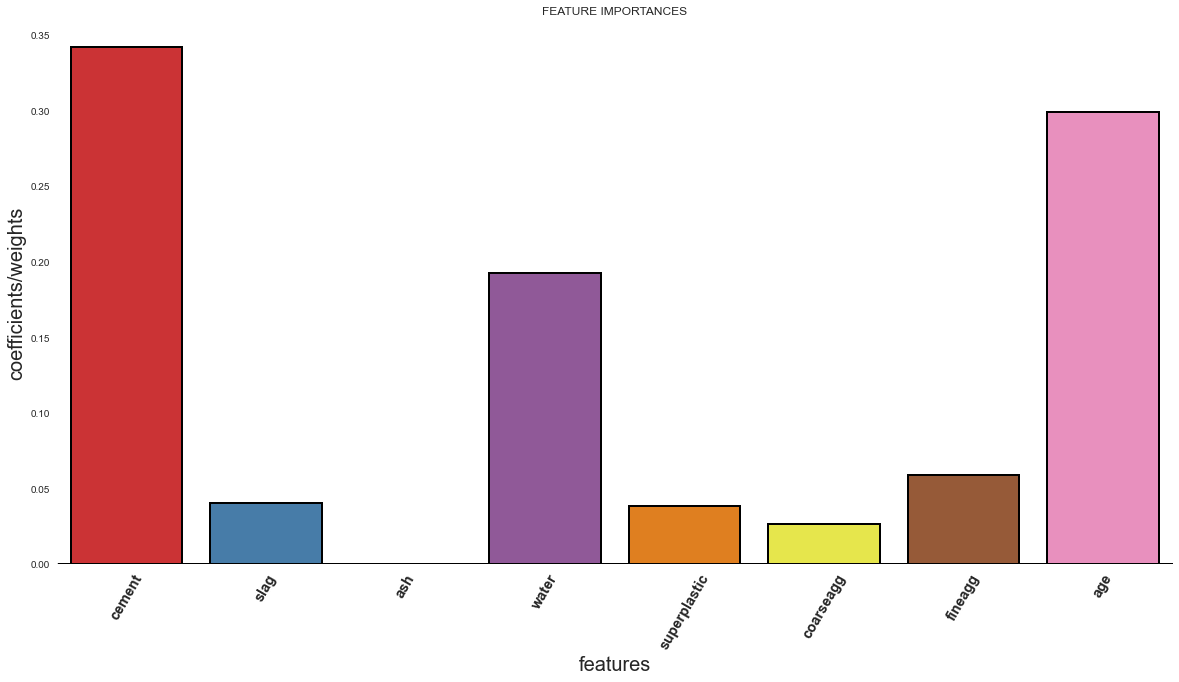

In [394]:
# Show Feature Importance
model_show_feature_importance(adaBoost, X_train, True)

In [395]:
# Observation :
# The list of features in the decreasing order of importance is :
# 1. age
# 2. cement
# 3. water

array([0.7487286 , 0.6784344 , 0.6672351 , 0.63761758, 0.64524407,
       0.79179239, 0.71368888, 0.61730775, 0.7088556 , 0.70416928,
       0.68788629, 0.63785163, 0.7404979 , 0.65084148, 0.79460574,
       0.71222789, 0.7695885 , 0.6689596 , 0.70142451, 0.73151337])

,Mean Accuracy,Standard Deviation
KFold,70.042353,5.01563


**Model performance range at 95% confidence interval is between 62.7% and 79.3%**


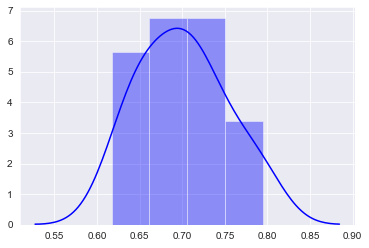

In [396]:
# Cross-Validation and Model Performance at 95% Confidence Interval :
stats = crossvalidation(adaBoost, X_train, y_train)
model_confidence_interval(stats)

In [397]:
# Final conclusion :
# GradientBoostingRegressor and RandomForestRegressor are the two best performing models for modeling of 
# strength of high performance concrete with very good accuracy.